# Springboard - Data Science Career Track - Capstone 2

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# import Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# suppress warnings
import warnings;
warnings.filterwarnings('ignore');

## Part 1: Data Wrangling

In [2]:
# import the data
raw_data = pd.read_csv('/Users/ryneschultz/OneDrive/Data Science Career Track/Capstone 2/Data/REIGN.csv')
df = raw_data

# inspect the data
df.head()

,ccode,country,leader,year,month,elected,age,male,militarycareer,tenure_months,...,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt,precip,couprisk,pctile_risk
0,2.0,USA,Truman,1950.0,1.0,1.0,66.0,1.0,0.0,58.0,...,0.0,2.639057,5.327876,7.565793,0.0,0.0,0.0,-0.049647,NaN,NaN
1,2.0,USA,Truman,1950.0,2.0,1.0,66.0,1.0,0.0,59.0,...,0.0,2.708050,5.332719,7.566311,0.0,0.0,0.0,-0.093614,NaN,NaN
2,2.0,USA,Truman,1950.0,3.0,1.0,66.0,1.0,0.0,60.0,...,0.0,2.772589,5.337538,7.566829,0.0,0.0,0.0,-0.086233,NaN,NaN
3,2.0,USA,Truman,1950.0,4.0,1.0,66.0,1.0,0.0,61.0,...,0.0,2.833213,5.342334,7.567346,0.0,0.0,0.0,-0.019793,NaN,NaN
4,2.0,USA,Truman,1950.0,5.0,1.0,66.0,1.0,0.0,62.0,...,0.0,2.890372,5.347107,7.567863,0.0,0.0,0.0,-0.107695,NaN,NaN


In [3]:
# describe the data
df.describe()

,ccode,year,month,elected,age,male,militarycareer,tenure_months,anticipation,ref_ant,...,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt,precip,couprisk,pctile_risk
count,132866.000000,132866.000000,132866.000000,132866.000000,132866.000000,132866.000000,132866.000000,132866.000000,132965.000000,132965.000000,...,132965.000000,132866.000000,132866.000000,132866.000000,132866.000000,132866.000000,132965.00000,132866.000000,98015.000000,98015.000000
mean,459.613859,1988.536526,6.491962,0.649512,57.109539,0.972446,0.194963,82.432007,0.106878,0.011439,...,0.007408,3.332831,4.386471,4.866373,0.180761,0.001746,0.00349,-0.028566,0.002408,0.509684
std,263.508680,18.816341,3.458172,0.477125,11.192059,0.163692,0.396174,95.629543,0.308959,0.106341,...,0.085750,1.313226,1.389447,1.459569,0.588872,0.041750,0.05897,0.775262,0.004763,0.296956
min,2.000000,1950.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-4.777218,0.000006,0.000021
25%,225.000000,1974.000000,3.000000,0.000000,50.000000,1.000000,0.000000,19.000000,0.000000,0.000000,...,0.000000,2.639057,3.555348,3.988984,0.000000,0.000000,0.00000,-0.492095,0.000359,0.251876
50%,439.000000,1990.000000,6.000000,1.000000,57.000000,1.000000,0.000000,47.000000,0.000000,0.000000,...,0.000000,3.401197,4.488636,5.030438,0.000000,0.000000,0.00000,-0.029448,0.000790,0.505837
75%,670.000000,2005.000000,10.000000,1.000000,65.000000,1.000000,0.000000,108.000000,0.000000,0.000000,...,0.000000,3.891820,5.402678,5.877736,0.000000,0.000000,0.00000,0.432549,0.002212,0.768884
max,990.000000,2019.000000,12.000000,1.000000,94.000000,1.000000,1.000000,672.000000,1.000000,1.000000,...,1.000000,8.110126,8.345455,8.521584,9.000000,1.000000,1.00000,4.746451,0.160026,1.023696


In [4]:
# remove missing values
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [5]:
# print unique government regime types
df['government'].unique()

array(['Presidential Democracy', 'Parliamentary Democracy',
       'Party-Personal', 'Personal Dictatorship',
       'Provisional - Military', 'Military', 'Military-Personal',
       'Provisional - Civilian', 'Foreign/Occupied', 'Dominant Party',
       'Indirect Military', 'Party-Military',
       'Party-Personal-Military Hybrid', 'Monarchy', 'Warlordism',
       'Oligarchy'], dtype=object)

In [6]:
# split 'government' into numerical features
df = pd.get_dummies(df, columns=['government'])

In [7]:
# inspect summary statistics for the cleaned data
df.describe()

,ccode,year,month,elected,age,male,militarycareer,tenure_months,anticipation,ref_ant,...,government_Oligarchy,government_Parliamentary Democracy,government_Party-Military,government_Party-Personal,government_Party-Personal-Military Hybrid,government_Personal Dictatorship,government_Presidential Democracy,government_Provisional - Civilian,government_Provisional - Military,government_Warlordism
count,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000,...,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000
mean,467.027742,1997.455566,6.479492,0.683175,57.782420,0.965616,0.185828,87.036139,0.110162,0.010866,...,0.002938,0.322049,0.010305,0.033741,0.015121,0.135037,0.186879,0.007836,0.002592,0.003949
std,265.369748,12.606859,3.459688,0.465241,11.044675,0.182215,0.388970,101.257794,0.313093,0.103674,...,0.054128,0.467264,0.100990,0.180564,0.122034,0.341765,0.389816,0.088174,0.050842,0.062714
min,2.000000,1975.000000,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,235.000000,1987.000000,3.000000,0.000000,50.000000,1.000000,0.000000,19.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,451.000000,1998.000000,6.000000,1.000000,57.000000,1.000000,0.000000,49.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,679.000000,2008.000000,9.000000,1.000000,65.000000,1.000000,0.000000,115.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,990.000000,2019.000000,12.000000,1.000000,94.000000,1.000000,1.000000,672.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Part 2: Exploratory Data Analysis

Text(0.5, 1.0, 'Successful Coups')

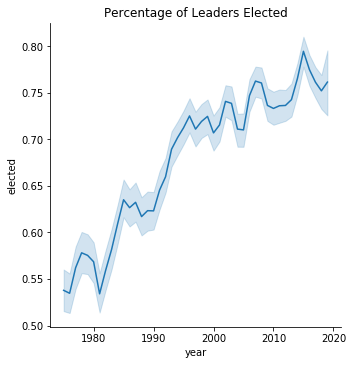

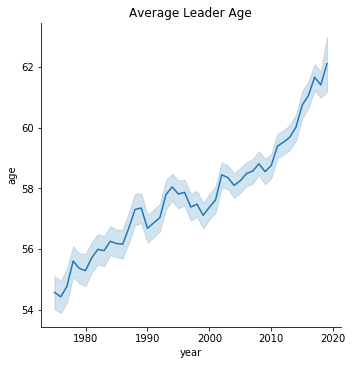

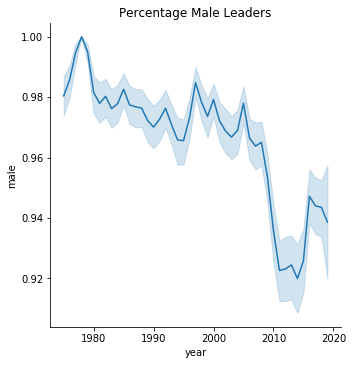

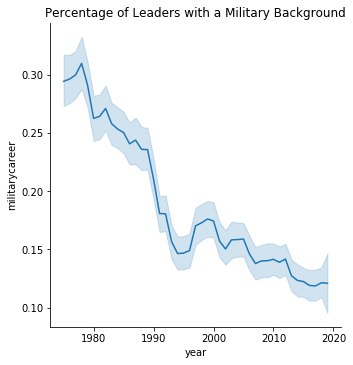

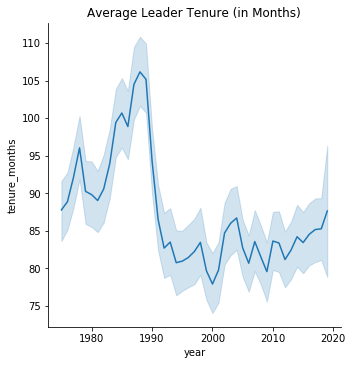

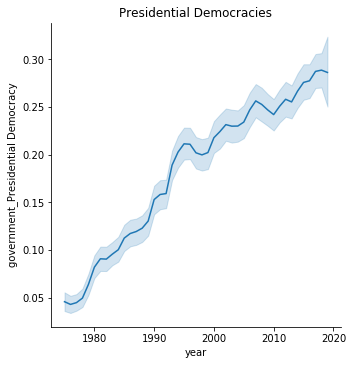

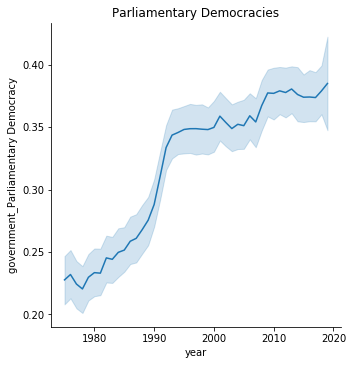

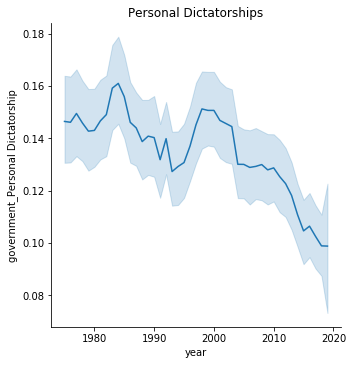

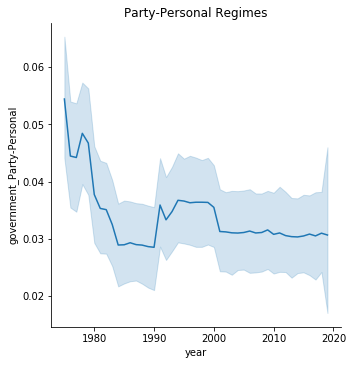

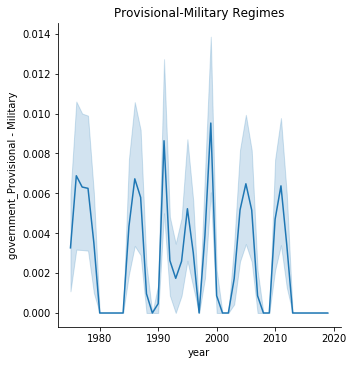

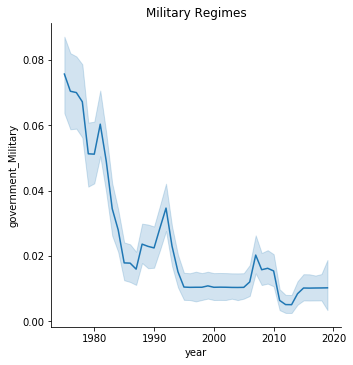

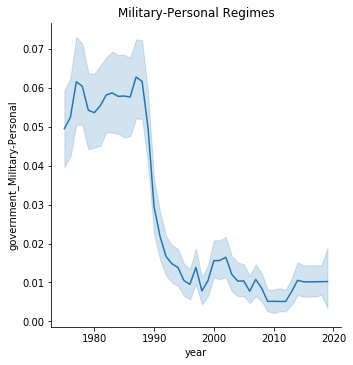

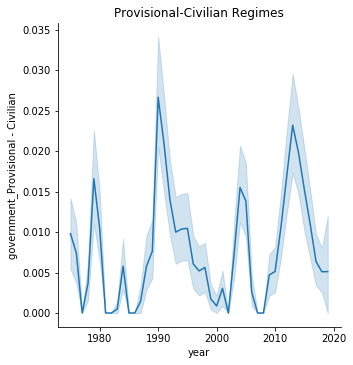

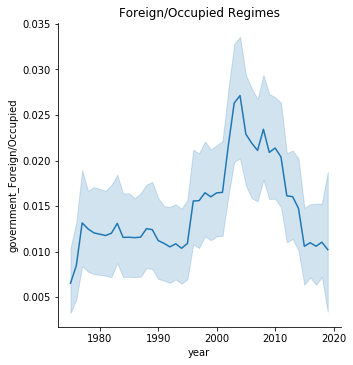

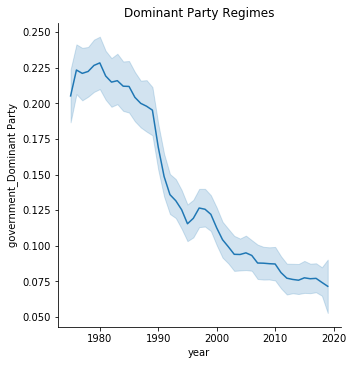

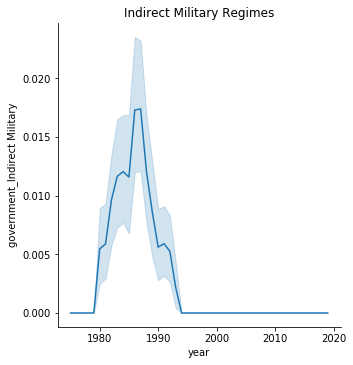

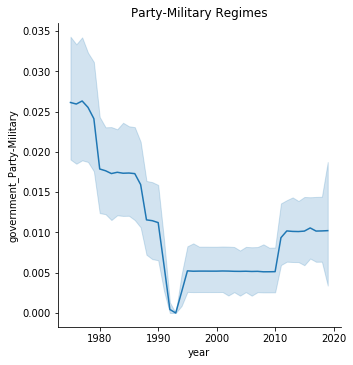

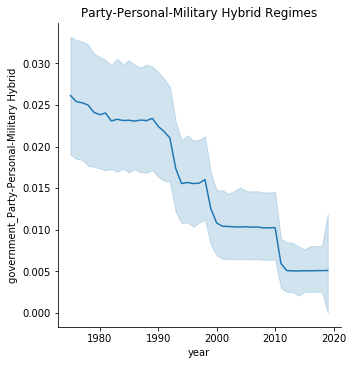

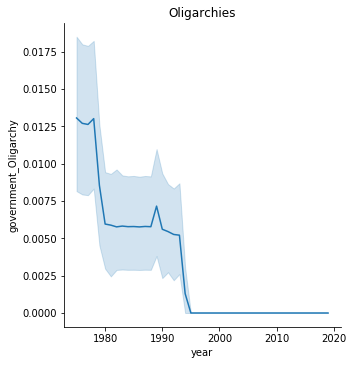

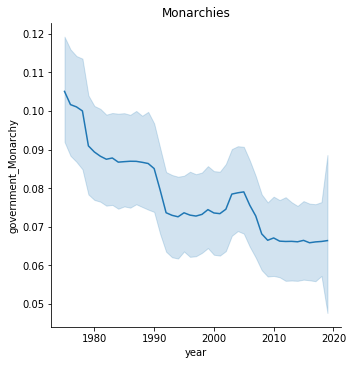

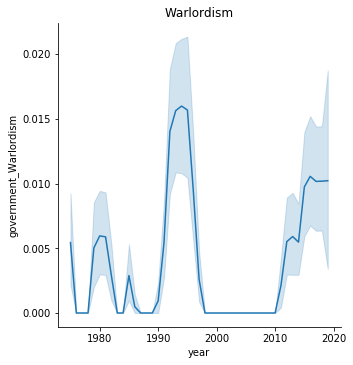

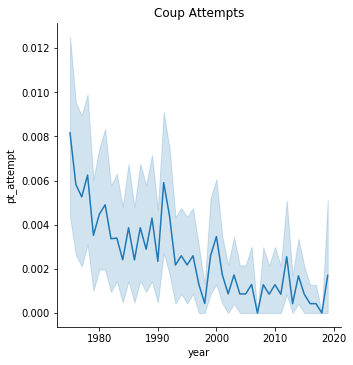

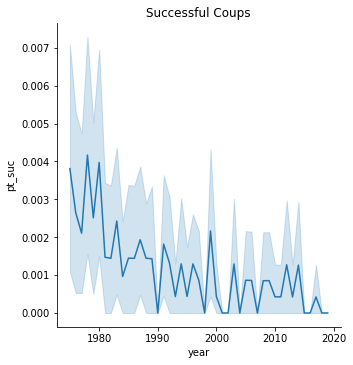

In [8]:
# visualize 'elected' over time
sns.relplot(x="year", y="elected", kind="line", data=df)
plt.title('Percentage of Leaders Elected')

# visualize 'age' over time
sns.relplot(x="year", y="age", kind="line", data=df)
plt.title('Average Leader Age')

# visualise 'male' over time
sns.relplot(x="year", y="male", kind="line", data=df)
plt.title('Percentage Male Leaders')

# visualise 'militarycareer' over time
sns.relplot(x="year", y="militarycareer", kind="line", data=df)
plt.title('Percentage of Leaders with a Military Background')

# visualise 'tenure_months' over time
sns.relplot(x="year", y="tenure_months", kind="line", data=df)
plt.title('Average Leader Tenure (in Months)')

# visualize 'government_Presidential Democracy'
sns.relplot(x="year", y="government_Presidential Democracy", kind="line", data=df)
plt.title('Presidential Democracies')

# visualize 'government_Parliamentary Democracy'
sns.relplot(x="year", y="government_Parliamentary Democracy", kind="line", data=df)
plt.title('Parliamentary Democracies')

# visualize 'government_Personal Dictatorship'
sns.relplot(x="year", y="government_Personal Dictatorship", kind="line", data=df)
plt.title('Personal Dictatorships')

# visualize 'government_Party-Personal'
sns.relplot(x="year", y="government_Party-Personal", kind="line", data=df)
plt.title('Party-Personal Regimes')

# visualize 'government_Provisional - Military'
sns.relplot(x="year", y="government_Provisional - Military", kind="line", data=df)
plt.title('Provisional-Military Regimes')

# visualize 'government_Military'
sns.relplot(x="year", y="government_Military", kind="line", data=df)
plt.title('Military Regimes')

# visualize 'government_Military-Personal'
sns.relplot(x="year", y="government_Military-Personal", kind="line", data=df)
plt.title('Military-Personal Regimes')

# visualize 'government_Provisional - Civilian'
sns.relplot(x="year", y="government_Provisional - Civilian", kind="line", data=df)
plt.title('Provisional-Civilian Regimes')

# visualize 'government_Foreign/Occupied'
sns.relplot(x="year", y="government_Foreign/Occupied", kind="line", data=df)
plt.title('Foreign/Occupied Regimes')

# visualize 'government_Dominant Party'
sns.relplot(x="year", y="government_Dominant Party", kind="line", data=df)
plt.title('Dominant Party Regimes')

# visualize 'government_Indirect Military'
sns.relplot(x="year", y="government_Indirect Military", kind="line", data=df)
plt.title('Indirect Military Regimes')

# visualize 'government_Party-Military'
sns.relplot(x="year", y="government_Party-Military", kind="line", data=df)
plt.title('Party-Military Regimes')

# visualize 'government_Party-Personal-Military Hybrid'
sns.relplot(x="year", y="government_Party-Personal-Military Hybrid", kind="line", data=df)
plt.title('Party-Personal-Military Hybrid Regimes')

# visualize 'government_Oligarchy'
sns.relplot(x="year", y="government_Oligarchy", kind="line", data=df)
plt.title('Oligarchies')

# visualize 'government_Monarchy'
sns.relplot(x="year", y="government_Monarchy", kind="line", data=df)
plt.title('Monarchies')

# visualize 'government_Warlordism'
sns.relplot(x="year", y="government_Warlordism", kind="line", data=df)
plt.title('Warlordism')

# visualize 'pt_attempt'
sns.relplot(x='year', y='pt_attempt', kind='line', data=df)
plt.title('Coup Attempts')

# visualize 'pt_suc'
sns.relplot(x='year', y='pt_suc', kind='line', data=df)
plt.title('Successful Coups')

In [9]:
# print the total number of observations
total = len(df)
print('Total Observations: ', total)
print('\n')

# print the total number of coup attempts
attempts = len(df[df['pt_attempt'] == 1])
print('Total Coup Attempts: ', attempts) 
print('\n')

# print the total number of coup attempts as a percentage of total observations
print('Total Coup Attempts as Percentage of Total Observations: ', attempts/total)
print('\n')

# print the total number of successful coup attempt as a percentage of total coup attempts
successful_attempts = len(df[df['pt_suc'] == 1])
print('Successful Coup Attempts as a Percentage of Total Coup Attempts :', successful_attempts/attempts)

Total Observations:  98010


Total Coup Attempts:  240


Total Coup Attempts as Percentage of Total Observations:  0.002448729721456994


Successful Coup Attempts as a Percentage of Total Coup Attempts : 0.4583333333333333


## Part 3: Model

In [10]:
# create variables X and y from the dataset
X = df.drop(columns=['ccode', 'country', 'leader', 'year', 'pt_suc', 'pt_attempt', 'couprisk', 'pctile_risk'])
y = df['pt_attempt']

# split data into test/train set (70/30 split) and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# set an instance of RandomForestClassifier
rfr_1 = RandomForestRegressor(n_estimators=10000, random_state=23, n_jobs=-1)

# fit the model to the training data
rfr_1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
           oob_score=False, random_state=23, verbose=0, warm_start=False)

In [11]:
# predict y values using the model
y_pred = rfr_1.predict(X_test)

# convert y_test to DataFrame
y_test = pd.DataFrame(y_test)

# reset the index
y_test = y_test.reset_index()

# drop new 'index' column
y_test = y_test.drop(columns=['index'])

# combine y_test and y_pred_rfr_1 into a single DataFrame
y_test['y_pred_rfr_1'] = y_pred

In [12]:
# set the threshold
threshold = 0.001

# seperate out y values where 'pt_attempt' == 1
y_test_coup = y_test[y_test['pt_attempt'] == 1]

# seperate out y_coup values where 'y_pred' <= threshold
y_test_coup_0 = y_test_coup[y_test_coup['y_pred_rfr_1'] <= threshold]
false_negatives = len(y_test_coup_0)
print('False Negatives: ', false_negatives)

# seperate out y_coup values where 'y_pred' > threshold
y_test_coup_non_0 = y_test_coup[y_test_coup['y_pred_rfr_1'] > threshold]
true_positives = len(y_test_coup_non_0)
print('True Positives: ', true_positives)

# seperate out y values where 'pt_attempt' == 0
y_test_non_coup = y_test[y_test['pt_attempt'] == 0]

# seperate out y_non_coup values where 'y_pred' <= threshold
y_test_non_coup_0 = y_test_non_coup[y_test_non_coup['y_pred_rfr_1'] <= threshold]
true_negatives = len(y_test_non_coup_0)
print('True Negatives: ', true_negatives)

# seperate out y_coup values where 'y_pred' > threshold
y_test_non_coup_non_0 = y_test_non_coup[y_test_non_coup['y_pred_rfr_1'] > threshold]
false_positives = len(y_test_non_coup_non_0)
print('False Positives:  ', false_positives)
print('\n')

# print the model's precision
precision = true_positives / (true_positives + false_positives)
print('Precision: ', precision)

# print the model's recall
recall = true_positives / (true_positives + false_negatives)
print('Recall: ', recall)

# print the model's f1 score
f1_score = 2 * precision * recall / (precision + recall)
print('F1 Score: ', f1_score)

False Negatives:  35
True Positives:  34
True Negatives:  23976
False Positives:   5358


Precision:  0.006305637982195846
Recall:  0.4927536231884058
F1 Score:  0.012451931880607947


## Part 4: Results

In [13]:
# determine the most important features
feature_imp = pd.DataFrame(rfr_1.feature_importances_,
                           index = X_train.columns,
                           columns=['importance']).sort_values('importance', ascending=False)
feature_imp

,importance
precip,0.246581
tenure_months,0.146931
loss,0.120372
irregular,0.102099
age,0.094222
lastelection,0.092760
month,0.067499
prev_conflict,0.014671
elected,0.009950
government_Presidential Democracy,0.008177


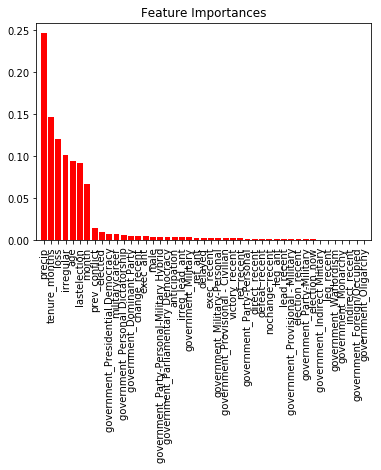

In [14]:
# plot feature importance
plt.figure()
plt.bar(range(X.shape[1]), feature_imp.values.reshape(1,45)[0],
       color="r", align="center")
plt.title("Feature Importances")
plt.xticks(range(X.shape[1]), feature_imp.index.values, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [15]:
# select a subset of the data containing only the most recent year-month
df = df[df['year'] == max(df['year'].values)]
df = df[df['month'] == max(df['month'].values)]
df = df.set_index(df['country'])

# create variables X and y from the dataset
X = df.drop(columns=['ccode', 'country', 'leader', 'year', 'pt_suc', 'pt_attempt', 'couprisk', 'pctile_risk'])

# extract the predicted class probabilities
predict_proba = rfr_1.predict(X)

# convert predict_proba to a DataFrame
predict_proba = pd.DataFrame(predict_proba, columns=['predict_proba'])

# modify predict_proba to set the index equal to country
results = predict_proba.set_index(df['country'].values)

# sort results from highest predict_proba to lowest predict_proba
results.sort_values(by=['predict_proba'], ascending=False)

,predict_proba
Gabon,0.2083
Turkey,0.0362
Cuba,0.0297
Korea South,0.0266
Tunisia,0.0258
Iran,0.0155
Thailand,0.0094
Egypt,0.0066
Latvia,0.0057
Lebanon,0.0044


In [24]:
# reset our data
df = raw_data

# select a subset of the reset data where pt_attempt == 1 (i.e. attempted coups only)
df = df[df['pt_attempt'] == 1]

# remove missing values
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

# apply one-hot-encoding to government feature
df = pd.get_dummies(df, columns=['government'])

# create X and y variables
X = df.drop(columns=['ccode', 'country', 'leader', 'year', 'pt_suc', 'pt_attempt', 'couprisk', 'pctile_risk'])
y = df['pt_suc']

# fit the model to the training data
rfr_1.fit(X, y)

# determine the most important features
feature_imp = pd.DataFrame(rfr_1.feature_importances_,
                           index = X.columns,
                           columns=['importance']).sort_values('importance', ascending=False)
feature_imp

,importance
age,0.134635
tenure_months,0.123130
precip,0.121160
loss,0.116671
irregular,0.105086
lastelection,0.093031
month,0.081108
government_Personal Dictatorship,0.026583
prev_conflict,0.026390
government_Military,0.019646


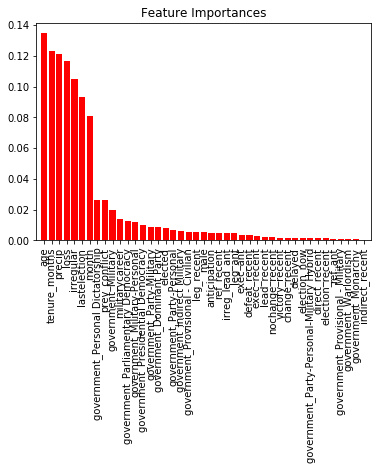

In [26]:
# plot feature importance
plt.figure()
plt.bar(range(X.shape[1]), feature_imp.values.reshape(1,43)[0],
       color="r", align="center")
plt.title("Feature Importances")
plt.xticks(range(X.shape[1]), feature_imp.index.values, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [27]:
# derive the predicted probabilities
y_pred = rfr_1.predict(X)

# convert y_test to DataFrame
y = pd.DataFrame(y)

# reset the index
y = y.reset_index()

# drop new 'index' column
y = y.drop(columns=['index'])

# combine y_test and y_pred_rfr_1 into a single DataFrame
y['y_pred_rfr_1'] = y_pred

In [40]:
# set the threshold
threshold = 0.67

# seperate out y values where 'pt_succ' == 1
y_success = y[y['pt_suc'] == 1]

# seperate out y_success values where 'y_pred' <= threshold
y_success_fn = y_success[y_success['y_pred_rfr_1'] <= threshold]
false_negatives = len(y_success_fn)
print('False Negatives: ', false_negatives)

# seperate out y_coup values where 'y_pred' > threshold
y_success_tp = y_success[y_success['y_pred_rfr_1'] > threshold]
true_positives = len(y_success_tp)
print('True Positives: ', true_positives)

# seperate out y values where 'pt_attempt' == 0
y_failure = y[y['pt_suc'] == 0]

# seperate out y_non_coup values where 'y_pred' <= threshold
y_failure_tn = y_failure[y_failure['y_pred_rfr_1'] <= threshold]
true_negatives = len(y_failure_tn)
print('True Negatives: ', true_negatives)

# seperate out y_coup values where 'y_pred' > threshold
y_failure_fp = y_failure[y_failure['y_pred_rfr_1'] > threshold]
false_positives = len(y_failure_fp)
print('False Positives:  ', false_positives)
print('\n')

# print the model's precision
precision = true_positives / (true_positives + false_positives)
print('Precision: ', precision)

# print the model's recall
recall = true_positives / (true_positives + false_negatives)
print('Recall: ', recall)

# print the model's f1 score
f1_score = 2 * precision * recall / (precision + recall)
print('F1 Score: ', f1_score)

False Negatives:  0
True Positives:  110
True Negatives:  130
False Positives:   0


Precision:  1.0
Recall:  1.0
F1 Score:  1.0
